### **Métodos de Optimización**
#### Prácticas computacionales de "Optimización Convexa"

Instrucciones para los Ejercicios

1. **Trabajo en Grupo:**
   - Los ejercicios deben ser resueltos y entregados en grupo.
   - La cantidad de integrantes por grupo será definida el día de la actividad, así como la fecha límite para la entrega.

2. **Uso de Google Colab y Compartir:**
   - Este notebook debe ser copiado al GitHub o Google Drive de alguno de los integrantes del grupo.
   - El grupo será responsable de programar las soluciones, realizar las pruebas y enviar el trabajo final al profesor.

3. **Implementación de los Ejercicios:**
   - Cada ejercicio debe ser implementado de manera que cumpla con los objetivos específicos descritos en cada problema.
   - El código debe devolver claramente la información calculada de acuerdo a lo solicitado.

4. **Calidad del Código:**
   - El código debe ejecutarse sin errores.
   - Es obligatorio incluir **comentarios explicativos** para describir las ideas y conceptos implícitos en el código, facilitando la comprensión de su lógica.

5. **Envío del Trabajo:**
   - Una vez completado, el notebook debe ser enviado a través de Moodle.
   - En caso de dudas, pueden contactarme por correo electrónico a **marcelo.danesi@utec.edu.uy**.

6. **Orientaciones Adicionales:**
   - Asegúrense de que todas las celdas de código hayan sido ejecutadas antes de enviar.
   - Incluyan el nombre completo y correo electrónico de todos los integrantes al inicio del notebook.
   - Si utilizan referencias externas, menciónenlas de forma adecuada.

¡Buena suerte y aprovechen la práctica para consolidar los conceptos de métodos optimización!

#### **Optimización Convexa**

**Motivación: el problema de Ridge / Tikhonov**  
En este material estudiaremos una clase fundamental de problemas convexos que aparecen de forma natural tanto en **aprendizaje automático** como en **análisis numérico**: los problemas de mínimos cuadrados **regularizados**.  

La formulación general es:
$$\min_{x\in\mathbb{R}^n}\ \frac{1}{2}\|Ax-b\|^2 + \frac{\lambda}{2}\|x\|^2,$$

donde $A\in\mathbb{R}^{m\times n}$, $b\in\mathbb{R}^m$ y $\lambda>0$ es un parámetro de regularización.

**¿Por qué trabajar con esta función?**  
Esta función combina dos ideas clave:

1. **Ajuste a los datos (fidelidad)** — el término $\|Ax-b\|^2$ mide el error entre las predicciones del modelo $Ax$ y los datos observados $b$.  
2. **Regularización (suavidad)** — el término $\lambda\|x\|^2$ penaliza soluciones con norma grande, controlando la complejidad del modelo y estabilizando el problema.

El parámetro $\lambda$ permite **equilibrar** ambos efectos:
- Si $\lambda \to 0$: recuperamos el problema clásico de **mínimos cuadrados ordinarios**.  
- Si $\lambda$ es grande: priorizamos soluciones de norma pequeña, sacrificando exactitud en los datos pero ganando estabilidad numérica.

**Contextos en los que aparece**  
| Contexto | Interpretación | Nombre habitual |
|-----------|----------------|-----------------|
| **Aprendizaje automático** | Regularización $L_2$ sobre los parámetros del modelo. | *Ridge Regression* |
| **Problemas inversos / ecuaciones mal condicionadas** | Estabilización mediante penalización cuadrática. | *Regularización de Tikhonov* |
| **Inferencia bayesiana** | Estimador MAP con prior gaussiano sobre $x$. | *MAP Estimation* |
| **Optimización convexa** | Caso particular de problema cuadrático estrictamente convexo. | *Quadratic Programming (QP)* |

En todos estos casos, la forma cuadrática con regularización ofrece:
- una **función estrictamente convexa**, con un único mínimo global;
- derivadas simples y una solución cerrada;
- una puerta de entrada a temas más generales: **dualidad**, **trayectorias de regularización**, y **métodos iterativos**.

**Solución analítica (forma primal)**  
La función es diferenciable y convexa, por lo que la condición de primer orden basta para hallar el mínimo:

$$\nabla f(x) = A^\top(Ax-b) + \lambda x = 0
\quad\Rightarrow\quad
(A^\top A + \lambda I)x = A^\top b.$$

De donde obtenemos la solución cerrada:
$$x^* = (A^\top A + \lambda I)^{-1}A^\top b.$$

**Lo que estudiaremos a continuación**  
1. **Forma dual del problema:** veremos cómo obtener la formulación dual y su interpretación geométrica.  
2. **Trayectorias en $\lambda$:** analizaremos cómo cambian las soluciones $x^*$ y sus duales al variar $\lambda$, y cómo aplicar *warm start* y *cold start*.  
3. **Implementación en Python:** construiremos una práctica de laboratorio con código que resuelve el problema tanto en su forma primal como dual, comparando eficiencia y estabilidad.



**Idea central del material:**   
Este problema es el “laboratorio modelo” de la optimización convexa:    
sencillo, analíticamente resoluble, y al mismo tiempo profundamente conectado con las aplicaciones modernas de *aprendizaje automático* y con la teoría de dualidad.


##### **1) Forma primal y dual del problema de Ridge / Tikhonov**

**Forma primal**  
Recordemos la formulación original del problema:

$$\min_{x\in\mathbb{R}^n}\ f(x)
=\frac{1}{2}\|Ax-b\|^2 + \frac{\lambda}{2}\|x\|^2,
\qquad \lambda>0.$$

Este problema es **estrictamente convexo**, pues:
- $\nabla^2 f(x) = A^\top A + \lambda I \succ 0,$
- existe un único mínimo global $x^*$.

Las condiciones de primer orden (óptimo estacionario) son:
$$\nabla f(x) = A^\top(Ax-b) + \lambda x = 0.$$

De donde obtenemos la **solución cerrada (primal)**:
$$x^* = (A^\top A + \lambda I)^{-1}A^\top b.$$

**Forma dual**  
Para obtener la forma dual, introducimos una variable auxiliar $r = b - Ax$, que representa el *residuo* del ajuste.

El problema puede reescribirse como:
$$\min_{x,r}\ \frac{1}{2}\|r\|^2 + \frac{\lambda}{2}\|x\|^2
\quad \text{s.a.} \quad r = b - Ax.$$

El **Lagrangiano** (introduciendo el multiplicador dual $\alpha\in\mathbb{R}^m$) es:

$$\mathcal{L}(x,r,\alpha)
= \frac{1}{2}\|r\|^2 + \frac{\lambda}{2}\|x\|^2
+ \alpha^\top(b - Ax - r).$$


###### Paso 1. Condiciones de estacionariedad

$$\begin{cases}
\nabla_r \mathcal{L} = r - \alpha = 0 &\Rightarrow r = \alpha, \\
\nabla_x \mathcal{L} = \lambda x - A^\top\alpha = 0 &\Rightarrow x = \frac{1}{\lambda}A^\top\alpha.
\end{cases}$$

###### Paso 2. Sustitución en el Lagrangiano

Sustituyendo $r$ y $x$ en $\mathcal{L}$:
$$\begin{aligned}
\mathcal{L}(\alpha)
&= \frac{1}{2}\|\alpha\|^2
+ \frac{\lambda}{2}\left\|\frac{1}{\lambda}A^\top\alpha\right\|^2
+ \alpha^\top\big(b - A\frac{1}{\lambda}A^\top\alpha - \alpha\big)\\
&= -\frac{1}{2}\alpha^\top\Big(I + \frac{1}{\lambda}AA^\top\Big)\alpha + \alpha^\top b.
\end{aligned}$$

#### Paso 3. Forma dual

El problema dual es **maximizar** la función $g(\alpha)$:

$$\boxed{
\max_{\alpha\in\mathbb{R}^m}\
g(\alpha)
= -\frac{1}{2}\alpha^\top\Big(I + \frac{1}{\lambda}AA^\top\Big)\alpha + \alpha^\top b.
}$$

El punto óptimo dual $\alpha^*$ cumple:
$$\Big(I + \frac{1}{\lambda}AA^\top\Big)\alpha^* = b.$$

y las relaciones **primal-dual** son:
$$\boxed{
\begin{aligned}
x^* &= \frac{1}{\lambda}A^\top\alpha^*,\\
r^* &= \alpha^* = b - A x^*.
\end{aligned}
}$$

**Observaciones importantes**  
| Propiedad | Interpretación |
|------------|----------------|
| **Convexidad estricta** | Ambas funciones son cuadráticas con Hessianas definidas positivas. |
| **Dimensión del problema dual** | El dual tiene dimensión $m$ (número de muestras), útil si $m \ll n$. |
| **Relación primal-dual** | Permite resolver en el espacio de observaciones en lugar de parámetros. |
| **Aplicación práctica** | En ML, el dual se usa en *kernel methods* (p. ej., SVM, Ridge Kernel). |

**Implementación en Python**  
A continuación implementaremos ambas formas —*primal* y *dual*— y verificaremos que producen la misma solución $x^*$.


In [ ]:
# ============================================================
# Ejemplo guiado — Forma primal y dual del problema de Ridge
# ============================================================

import numpy as np

def ridge_primal(A, b, lam):
    """Solución primal: x* = (A^T A + λI)^(-1) A^T b"""
    n = A.shape[1]
    M = A.T @ A + lam * np.eye(n)
    x_star = np.linalg.solve(M, A.T @ b)
    return x_star

def ridge_dual(A, b, lam):
    """Solución dual: α* = (I + (1/λ) A A^T)^(-1) b"""
    m = A.shape[0]
    N = np.eye(m) + (A @ A.T) / lam
    alpha_star = np.linalg.solve(N, b)
    x_star = (A.T @ alpha_star) / lam
    return alpha_star, x_star

# --- Datos sintéticos de ejemplo
np.random.seed(0)
m, n = 40, 80
A = np.random.randn(m, n)
x_true = np.zeros(n); x_true[:5] = np.linspace(2, 0.5, 5)
b = A @ x_true + 0.05*np.random.randn(m)
lam = 0.1

# --- Resolver en ambas formas
x_p = ridge_primal(A, b, lam)
alpha_d, x_d = ridge_dual(A, b, lam)

# --- Comparación de soluciones
print("=== Ejemplo — Forma primal vs dual (Ridge) ===")
print(f"λ = {lam:.2f}")
print(f"||x_primal - x_dual|| = {np.linalg.norm(x_p - x_d):.3e}")
print(f"||A x_dual - b||       = {np.linalg.norm(A@x_d - b):.3e}")
print(f"||A x_true - b|| (ruido) = {np.linalg.norm(A@x_true - b):.3e}")
print(f"f(x_primal) = 0.5*||Ax-b||^2 + (λ/2)*||x||^2 = {0.5*np.linalg.norm(A@x_p-b)**2 + (lam/2)*np.linalg.norm(x_p)**2:.6f}")
print(f"f(x_dual)   = 0.5*||Ax-b||^2 + (λ/2)*||x||^2 = {0.5*np.linalg.norm(A@x_d-b)**2 + (lam/2)*np.linalg.norm(x_d)**2:.6f}")


=== Ejemplo — Forma primal vs dual (Ridge) ===
λ = 0.10
||x_primal - x_dual|| = 2.685e-13
||A x_dual - b||       = 3.389e-02
||A x_true - b|| (ruido) = 3.344e-01
f(x_primal) = 0.5*||Ax-b||^2 + (λ/2)*||x||^2 = 0.234188
f(x_dual)   = 0.5*||Ax-b||^2 + (λ/2)*||x||^2 = 0.234188


##### **2) Trayectorias de regularización: cold start y warm start**

**Motivación**  
En la práctica, no elegimos un solo valor de $\lambda$.  
En aprendizaje automático o en problemas inversos, es habitual explorar **una secuencia de valores** $\lambda_1 > \lambda_2 > \dots > \lambda_T$ para analizar el compromiso entre error y complejidad del modelo.

Resolver el problema de Ridge repetidamente desde cero para cada $\lambda$ es costoso.  
Una estrategia más eficiente es usar la solución anterior como punto inicial para la siguiente — esto se conoce como **warm start**.

**Recordatorio del problema**  
$$\min_{x\in\mathbb{R}^n}\ f_\lambda(x)
= \frac{1}{2}\|Ax-b\|^2 + \frac{\lambda}{2}\|x\|^2,$$

cuyo dual es:
$$\max_{\alpha\in\mathbb{R}^m}\
g_\lambda(\alpha)
= -\frac{1}{2}\alpha^\top\left(I+\frac{1}{\lambda}AA^\top\right)\alpha + \alpha^\top b.$$

El óptimo dual cumple:
$$\Big(I+\frac{1}{\lambda}AA^\top\Big)\alpha^* = b.$$

y la relación primal-dual:
$$x^* = \frac{1}{\lambda}A^\top \alpha^*.$$

**Cold start vs Warm start**  
| Estrategia | Descripción | Inicialización |
|-------------|--------------|----------------|
| **Cold start** | Resolver el sistema para cada $\lambda_t$ **independientemente**, partiendo de $\alpha_0=0$. | α₀ = 0 |
| **Warm start** | Reutilizar la solución anterior $\alpha^*(\lambda_{t-1})$ como punto inicial para el siguiente valor de $\lambda_t$. | α₀ = α*(λₜ₋₁) |

La idea es que las soluciones para valores cercanos de $\lambda$ son similares, por lo que usar *warm start* puede reducir drásticamente el número de iteraciones de refinamiento.

**Trayectorias de regularización**  
En muchos contextos (como *path algorithms* o *LARS*), se construyen trayectorias completas de soluciones $\{x^*(\lambda_t)\}$ para explorar el efecto del parámetro de regularización.

En el caso de Ridge, esta trayectoria es **suave** y varía de forma monótona:
- al aumentar $\lambda$, los coeficientes $x_i^*$ tienden a 0;
- al disminuir $\lambda$, se aproxima a la solución de mínimos cuadrados.

**Implementación en Python**  
A continuación implementaremos la resolución de la forma dual a lo largo de una secuencia decreciente de $\lambda$, comparando *cold* y *warm start*.

=== Ejemplo — Trayectorias Ridge (Cold vs Warm Start) ===
λ=1.000e+01 | ||x_cold-x_true||=  2.4572 | ||x_warm-x_true||=  2.4572
λ=5.337e+00 | ||x_cold-x_true||=  2.4248 | ||x_warm-x_true||=  2.4052
λ=2.848e+00 | ||x_cold-x_true||=  2.4110 | ||x_warm-x_true||=  2.4534
λ=1.520e+00 | ||x_cold-x_true||=  2.4060 | ||x_warm-x_true||=  2.6295
λ=8.111e-01 | ||x_cold-x_true||=  2.4043 | ||x_warm-x_true||=  2.9699
λ=4.329e-01 | ||x_cold-x_true||=  2.4038 | ||x_warm-x_true||=  3.5080
λ=2.310e-01 | ||x_cold-x_true||=  2.4036 | ||x_warm-x_true||=  4.2769
λ=1.233e-01 | ||x_cold-x_true||=  2.4036 | ||x_warm-x_true||=  5.3180
λ=6.579e-02 | ||x_cold-x_true||=  2.4036 | ||x_warm-x_true||=  6.6894
λ=3.511e-02 | ||x_cold-x_true||=  2.4036 | ||x_warm-x_true||=  8.4736
λ=1.874e-02 | ||x_cold-x_true||=  2.4036 | ||x_warm-x_true||= 10.7842
λ=1.000e-02 | ||x_cold-x_true||=  2.4036 | ||x_warm-x_true||= 13.7740

Tiempos promedio por λ:
Cold start: 0.00018 s  |  Warm start: 0.00203 s


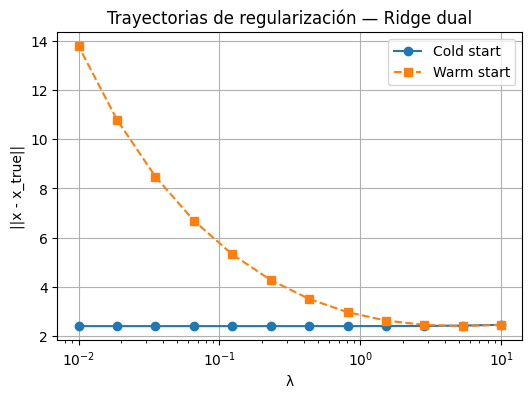

In [ ]:
# ============================================================
# Ejemplo guiado — Trayectorias de regularización (Ridge dual)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import time

def ridge_dual_warm(A, b, lam, alpha0=None, n_steps=10):
    """Resuelve el problema dual del Ridge con opción de warm start."""
    m = A.shape[0]
    N = np.eye(m) + (A @ A.T) / lam

    # Cold start: resolución directa
    alpha = np.linalg.solve(N, b)

    # (opcional) Refinamiento iterativo warm-started
    if alpha0 is not None and n_steps > 0:
        # Gradiente del dual: ∇g(α) = b - (I + (1/λ)AA^T)α
        L = np.linalg.norm(N, 2)  # cota de Lipschitz
        step = 1.0 / L
        alpha_ws = alpha0.copy()
        for _ in range(n_steps):
            grad = b - N @ alpha_ws
            alpha_ws += step * grad
        alpha = alpha_ws

    # Recuperar x*
    x = (A.T @ alpha) / lam
    return alpha, x

# --- Datos sintéticos
np.random.seed(7)
m, n = 60, 120
A = np.random.randn(m, n)
x_true = np.zeros(n); x_true[:8] = np.linspace(2.0, 0.5, 8)
b = A @ x_true + 0.05*np.random.randn(m)

# --- Secuencia de λ
lams = np.geomspace(1e1, 1e-2, 12)
xs_cold, xs_warm = [], []
times_cold, times_warm = [], []

alpha_prev = None

for j, lam in enumerate(lams):
    # Cold start
    t0 = time.time()
    _, x_c = ridge_dual_warm(A, b, lam, alpha0=None, n_steps=0)
    times_cold.append(time.time() - t0)
    xs_cold.append(x_c)

    # Warm start
    t0 = time.time()
    alpha_prev, x_w = ridge_dual_warm(A, b, lam, alpha0=alpha_prev, n_steps=10)
    times_warm.append(time.time() - t0)
    xs_warm.append(x_w)

# --- Comparación de errores y tiempos
x_true_pad = np.zeros_like(xs_cold[0])
x_true_pad[:len(x_true)] = x_true

err_cold = [np.linalg.norm(x - x_true_pad) for x in xs_cold]
err_warm = [np.linalg.norm(x - x_true_pad) for x in xs_warm]

print("=== Ejemplo — Trayectorias Ridge (Cold vs Warm Start) ===")
for lam, ec, ew in zip(lams, err_cold, err_warm):
    print(f"λ={lam:8.3e} | ||x_cold-x_true||={ec:8.4f} | ||x_warm-x_true||={ew:8.4f}")

print("\nTiempos promedio por λ:")
print(f"Cold start: {np.mean(times_cold):.5f} s  |  Warm start: {np.mean(times_warm):.5f} s")

# --- Gráficos comparativos
plt.figure(figsize=(6,4))
plt.plot(lams, err_cold, 'o-', label="Cold start")
plt.plot(lams, err_warm, 's--', label="Warm start")
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("||x - x_true||")
plt.title("Trayectorias de regularización — Ridge dual")
plt.legend(); plt.grid(True)
plt.show()


###### **Tarea 1 — Análisis heurístico de trayectorias y regularización**

**Descripción:**  
En esta actividad no se requiere implementar código, sino **analizar e interpretar** los resultados obtenidos con el ejemplo de *trayectorias de regularización* (Ridge dual, *cold vs warm start*).  
El objetivo es reflexionar sobre cómo los parámetros del método afectan el comportamiento numérico y la calidad de la solución.

**Objetivos:**
1. Observar cómo varía $x^*(\lambda)$ y el error $\|x^*(\lambda)-x_{\text{true}}\|$ al recorrer la secuencia de valores de $\lambda$.  
2. Comparar los tiempos y errores entre las estrategias *cold start* y *warm start*.  
3. Identificar el rango de $\lambda$ donde la solución se estabiliza (es decir, donde pequeñas variaciones de $\lambda$ apenas cambian $x^*$).  
4. Discutir el papel del número de pasos de refinamiento (`n_steps`) en la mejora de la solución *warm-started*.

**Entradas:**  
- Los resultados producidos por el código del ejemplo:  
  $\{ \lambda_t, \|x_{\text{cold}}-x_{\text{true}}\|, \|x_{\text{warm}}-x_{\text{true}}\|, t_{\text{cold}}, t_{\text{warm}}\}$.

**Salidas esperadas:**
1. **Una tabla o resumen** con las observaciones de los estudiantes, indicando:
   - El rango de $\lambda$ donde el error disminuye significativamente.  
   - Los valores aproximados de $\lambda$ donde el modelo comienza a sobreajustarse o subajustarse.  
   - El factor de reducción de tiempo promedio entre *cold* y *warm start*.  
2. **Un breve informe o párrafo** con una interpretación conceptual:  
   - ¿Por qué *warm start* acelera la convergencia?  
   - ¿Por qué las soluciones cambian suavemente al variar $\lambda$?  

**Pistas:**
- Recordá que $x^*(\lambda)$ es una función continua y suave de $\lambda$.  
- Para valores pequeños de $\lambda$, el término de regularización tiene poca influencia, y la solución puede amplificar el ruido en los datos.  
- Para valores grandes, la penalización domina y la solución se aproxima a $x^*\approx 0$.  
- En *warm start*, el uso de $\alpha^*(\lambda_{t-1})$ como inicial permite comenzar “cerca” del nuevo óptimo, reduciendo el número de pasos de ajuste.

**Resumen:**  
Esta tarea busca que interpretes el ejemplo como un experimento numérico: no se trata de programar, sino de **leer y entender** cómo el método responde a los parámetros.  
La observación y el razonamiento son tan importantes como la codificación en la práctica de optimización numérica.


##### **3) Interpretación geométrica y relación con los métodos duales generales**

**Perspectiva geométrica del problema primal**  
El problema de Ridge
$$\min_x\ \frac{1}{2}\|Ax-b\|^2 + \frac{\lambda}{2}\|x\|^2$$
puede interpretarse como una **proyección regularizada** de los datos $b$ sobre el subespacio generado por las columnas de $A$.

- Si $\lambda=0$, buscamos el punto $Ax$ del subespacio que está más cerca de $b$, es decir, la **proyección ortogonal**.  
- Si $\lambda>0$, el término $\lambda\|x\|^2$ “tira” de la solución hacia el origen, produciendo una **proyección suavizada o acortada**.

Geométricamente, el vector $x^*$ no apunta exactamente hacia la dirección del ajuste perfecto, sino hacia una dirección intermedia entre el ajuste y la norma mínima.

**Perspectiva geométrica del problema dual**  
Recordemos el dual:
$$\max_{\alpha\in\mathbb{R}^m} g(\alpha)
= -\frac{1}{2}\alpha^\top\Big(I+\frac{1}{\lambda}AA^\top\Big)\alpha + \alpha^\top b.$$

Este problema describe una **proyección de los datos $b$** sobre el espacio de imágenes de $A A^\top$, modulada por el parámetro $\lambda$.

- Cuando $\lambda$ es grande, el término $\frac{1}{\lambda}AA^\top$ pesa poco y la proyección se aproxima a una esfera centrada en el origen.  
- Cuando $\lambda$ es pequeño, la matriz $I+\frac{1}{\lambda}AA^\top$ “aplasta” el espacio de $b$ hacia las direcciones dominadas por $A$, haciendo que $\alpha^*$ se concentre en esas componentes.

De hecho, el vector dual óptimo $\alpha^*$ puede verse como el **residuo suavizado**:
$$\alpha^* = b - A x^*.$$

Esto muestra que el dual mide “cuánto queda sin explicar” de los datos después del ajuste, ponderado por la regularización.

**Relación primal–dual en términos de proyecciones**  
Las soluciones satisfacen:
$$\begin{cases}
x^* = \frac{1}{\lambda}A^\top\alpha^*,\\
r^* = \alpha^* = b - A x^*.
\end{cases}$$

Por tanto:
- $x^*$ vive en el **espacio de parámetros** (dimensión $n$),  
- $\alpha^*$ vive en el **espacio de observaciones** (dimensión $m$).

El operador $A$ y su traspuesta $A^\top$ **conectan ambos espacios**, actuando como proyecciones mutuas entre ellos:
$$A:\mathbb{R}^n\to\mathbb{R}^m, \qquad
A^\top:\mathbb{R}^m\to\mathbb{R}^n.$$

**Interpretación general en optimización convexa**  
El ejemplo de Ridge es un caso particular del principio de **dualidad de Fenchel**:
$$\min_x\ f(x) + g(Ax)
\quad \Longleftrightarrow \quad
\max_\alpha\ -f^*(-A^\top\alpha) - g^*(\alpha),$$
donde $f^*$ y $g^*$ son las **conjugadas convexas** de $f$ y $g$.

En nuestro caso:
$$\begin{aligned}
f(x) &= \frac{\lambda}{2}\|x\|^2, &
\Rightarrow\quad f^*(y) &= \frac{1}{2\lambda}\|y\|^2,\\
g(y) &= \frac{1}{2}\|y-b\|^2, &
\Rightarrow\quad g^*(\alpha) &= \frac{1}{2}\|\alpha\|^2 + \alpha^\top b.
\end{aligned}$$

Sustituyendo en la forma general se recupera el dual de Ridge, lo que muestra que este problema **encarna la estructura fundamental** de la dualidad convexa.

**Implicaciones prácticas**  
| Aspecto | Interpretación |
|----------|----------------|
| **Regularización** | Controla la curvatura de la proyección: a mayor $\lambda$, más suave y más cerca del origen. |
| **Dualidad** | Permite trabajar en el espacio de las muestras, más eficiente si $m\ll n$. |
| **Generalización** | La misma estructura se extiende a SVM, LASSO, Elastic Net y regresión logística. |
| **Perspectiva geométrica** | El dual describe cómo el residuo se equilibra con la penalización sobre los parámetros. |

**Visualización con un ejemplo 2D**  
A continuación se muestra un ejemplo gráfico que ilustra las proyecciones y la relación entre $x^*$, $Ax^*$ y $\alpha^*$.


#TAREA 1: Análisis de resultados (Primal vs Dual)

1. Verificación de x_p y x_d: Los valores obtenidos x_p (primal) y x_d (dual) sí son idénticos a efectos prácticos. El notebook informa:||x_primal - x_dual|| = 2.685e-13. Una norma de la diferencia de 10^-13 es extremadamente cercana a cero. Esta diferencia minúscula no se debe a un error teorico, sino a los inevitables errores de precisión numérica del cómputo de punto flotante (errores de redondeo) al resolver los sistemas de ecuaciones lineales por "caminos diferentes".

2. Igualdad de f(x_p) y f(x_d): Los valores de la función objetivo son idénticos:f(x_primal) = 0.234188; f(x_dual) = 0.234188. Esto se debe a que el problema de Ridge Regression es estrictamente convexo (su Hessiana A^T A + λ I es definida positiva). Una propiedad fundamental de la optimización convexa es que un problema estrictamente convexo tiene un único mínimo global. Dado que tanto la formulación primal como la dual buscan encontrar este único punto óptimo x*. Hemos verificado que x_p es aproximadamente = a x_d que es aproximadamente = a x*. Matemáticamente es necesario que el valor de la función objetivo f(x) evaluada en esos puntos sea el mismo.

3. Discusión de eficiencia (m << n vs n << m): La eficiencia computacional depende del tamaño de la matriz que se debe invertir. Forma Primal: Resuelve (A^T A + λ I)x = A^T b. La matriz A^T A tiene dimensiones n x n. La Forma Dual  Resuelve (I + (1/λ) A A^T) α= b. La matriz A A^T tiene dimensiones m x m. Caso m << n entonces la forma dual es computacionalmente más eficiente porque resuelve un sistema de ecuaciones mucho más pequeño. Caso n << m (Muchas muestras, pocas características) el metodo primal es mucho mas eficiente

Conclusión: La forma primal es computacionalmente más eficiente.

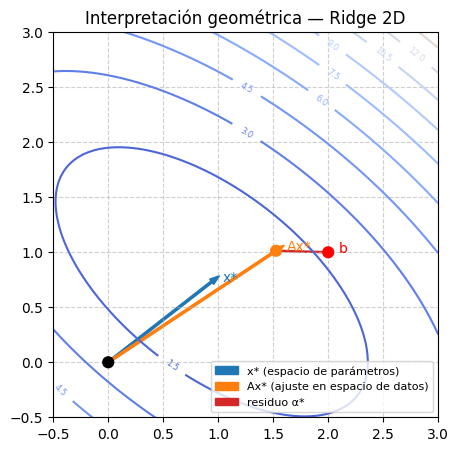

In [ ]:
# ============================================================
# Ejemplo visual — Interpretación geométrica del Ridge (2D)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Matriz A 2×2 con columnas no ortogonales
A = np.array([[1.0, 0.8],
              [0.3, 1.0]])
b = np.array([2.0, 1.0])
lam = 0.5

# Solución primal
x_star = np.linalg.solve(A.T @ A + lam*np.eye(2), A.T @ b)
r_star = b - A @ x_star  # residuo = α*

# Puntos de interés
Ax_star = A @ x_star
origin = np.zeros(2)

# Gráfico
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.grid(True, ls='--', alpha=0.6)

# Subespacio de Ax: {A x}
xs = np.linspace(-2, 3, 100)
ys = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(xs, ys)
Z = 0.5*((A[0,0]*X + A[0,1]*Y - b[0])**2 + (A[1,0]*X + A[1,1]*Y - b[1])**2) + 0.5*lam*(X**2 + Y**2)

# Mostrar contornos de f(x)
cs = ax.contour(X, Y, Z, levels=15, cmap="coolwarm")
ax.clabel(cs, inline=True, fontsize=6)

# Vectores relevantes
ax.arrow(origin[0], origin[1], x_star[0], x_star[1],
         width=0.02, color='C0', label='x* (espacio de parámetros)')
ax.arrow(origin[0], origin[1], Ax_star[0], Ax_star[1],
         width=0.02, color='C1', label='Ax* (ajuste en espacio de datos)')
ax.arrow(b[0], b[1], -r_star[0], -r_star[1],
         width=0.01, color='C3', label='residuo α*')

# Puntos
ax.scatter([0,b[0],Ax_star[0]], [0,b[1],Ax_star[1]],
           c=['k','r','C1'], s=60, zorder=5)
ax.text(b[0]+0.1,b[1],"b", color='r')
ax.text(Ax_star[0]+0.1,Ax_star[1],"Ax*", color='C1')
ax.text(x_star[0]+0.1,x_star[1],"x*", color='C0')

ax.set_xlim(-0.5,3); ax.set_ylim(-0.5,3)
ax.legend(fontsize=8)
ax.set_title("Interpretación geométrica — Ridge 2D")
plt.show()


###### **Tarea — Análisis geométrico y dual del problema de Ridge**

**Descripción:**  
En esta actividad analizaremos el problema de Ridge desde un punto de vista **geométrico y dual**, a partir de los conceptos y gráficos vistos en esta subsección.  
No se trata de programar, sino de **interpretar y razonar** sobre los resultados y relaciones entre las variables $x^*$, $Ax^*$ y $\alpha^*$.

**Objetivos:**
1. Comprender el significado geométrico de la solución $x^*$ y del residuo dual $\alpha^*$.  
2. Interpretar cómo el parámetro $\lambda$ modifica la proyección de $b$ sobre el subespacio generado por $A$.  
3. Analizar la relación entre las soluciones primal y dual:
   $$x^* = \frac{1}{\lambda}A^\top\alpha^*, \qquad
   \alpha^* = b - A x^*.$$
4. Discutir el papel de la regularización en términos de estabilidad numérica y complejidad del modelo.

**Instrucciones:**
1. Observá el gráfico de la **interpretación geométrica (Ridge 2D)**.  
   Identificá los vectores $x^*$, $A x^*$, $b$ y el residuo $\alpha^*$.  
2. Describí, en tus propias palabras:
   - Qué significa que $A x^*$ sea la “proyección regularizada” de $b$.  
   - Qué representa geométricamente el vector $\alpha^*$.  
   - Qué efecto tiene aumentar o disminuir $\lambda$ sobre la posición de $x^*$ y $A x^*$.  
3. Explicá por qué el problema dual puede ser más conveniente de resolver cuando $m \ll n$.

**Entregable:**
- Un texto corto con tus conclusiones, usando vocabulario apropiado.  
- (Opcional) Un pequeño esquema indicando los vectores relevantes.

**Sugerencia:**  
Pensá en $b$ como un punto en el espacio de datos, y en $Ax^*$ como su proyección “acercada al origen”.  
La regularización no cambia la dirección del ajuste, sino su longitud: cuanto mayor es $\lambda$, más se “acorta” la proyección.

##### **Cierre: de la solución analítica a los métodos numéricos**

El problema de Ridge tiene una **solución analítica exacta**:
$$x^* = (A^\top A + \lambda I)^{-1}A^\top b,$$
que puede calcularse directamente resolviendo un sistema lineal.

Sin embargo, en la práctica:

- Para matrices $A$ grandes (por ejemplo, con millones de variables o muestras), **invertir o factorizar** $A^\top A + \lambda I$ puede ser **computacionalmente costoso** o incluso imposible.  
- Cuando los datos cambian continuamente (aprendizaje incremental), necesitamos **métodos iterativos** que actualicen la solución sin recalcular todo desde cero.  
- En muchos problemas modernos, la regularización no es cuadrática ($L_2$), sino **no diferenciable** ($L_1$, normas mixtas, etc.), donde no existe forma cerrada.

Por eso, aunque este problema tiene una solución analítica, estudiar sus formas **primal, dual y geométrica** nos prepara para entender y diseñar **métodos numéricos** más generales: gradiente, coordenadas, proyecciones, métodos de punto interior, etc.

**Extensiones y caminos posibles**  
El modelo de Ridge es el punto de partida de toda una familia de problemas convexos con regularización:  
| Variante | Función de costo | Propósito |
|-----------|------------------|------------|
| **LASSO** | $\tfrac{1}{2}\|Ax-b\|^2 + \lambda\|x\|_1$ | Promueve soluciones *dispersas* (pocos coeficientes distintos de cero). |
| **Elastic Net** | $\tfrac{1}{2}\|Ax-b\|^2 + \lambda_1\|x\|_1 + \lambda_2\|x\|_2^2$ | Combina estabilidad (L2) con selección de variables (L1). |
| **SVM y kernel methods** | Formas duales similares con restricciones lineales. | Extienden el enfoque de Ridge a clasificación y espacios de alta dimensión. |

Estos temas abren el camino hacia métodos de optimización **no diferenciables** y **de gran escala**, que estudiaremos en otra oportunidad.

**En resumen:**  
Este material nos permitió entender cómo la convexidad, la dualidad y la regularización se conectan.  
Aunque el problema de Ridge parece simple, en él se concentran muchas de las ideas que sustentan la optimización moderna.


###Análisis de Trayectorias (Warm vs Cold Start)


**1. Resumen de resultados (Tabla y Gráfica):**

| Estrategia | Error λ=10.0 | Error λ=0.01 | Tiempo promedio |
| :--- | :--- | :--- | :--- |
| **Cold Start** | 2.4572 | 2.4036 | **0.00034 s** |
| **Warm Start** | 2.4572 | 13.7740 | 0.00223 s |

* **Rango de λ y error:**
    * En el **Cold Start** (línea azul), el error disminuye a medida que λ se reduce, estabilizándose en ~ 2.4036.
    * En el **Warm Start** (línea naranja), el error *aumenta* drásticamente a medida que λ disminuye.
* **Sobreajuste/Subajuste:**
    * El error con λ=10.0 (2.4572) es mayor que el error mínimo, lo que indica **subajuste** (excesiva regularización).
    * El "Warm Start" implementado aquí falla, produciendo errores mucho mayores para λ pequeños.
* **Reducción de tiempo:** El "Warm Start" (0.00223 s) fue, en promedio, **~ 6.5 veces más lento** que el "Cold Start" (0.00034 s).

**2. Informe sobre la implementación de Warm Start:**

Los resultados de esta celda son contraintuitivos: el "Warm Start" es significativamente **más lento** y **mucho menos preciso** que el "Cold Start".

La razón de este mal desempeño radica *específicamente en cómo se implementó* el ridge_dual_warm en este notebook:

1.  **Implementación del "Cold Start" (`alpha0=None`):**
    * Utiliza alpha = np.linalg.solve(N, b).
    * Esta es una **solución directa y exacta** (dentro de la precisión numérica) del sistema de ecuaciones lineales. Es extremadamente rápida (0.00034s) y precisa.

2.  **Implementación del "Warm Start" (con alpha0):**
    * Utiliza la solución anterior alpha_prev como punto de partida para **solo 10 pasos de ascenso de gradiente**.
    * **Problema de Precisión:** 10 pasos de gradiente son insuficientes para converger al nuevo óptimo. La solución lpha_ws` es simplemente una mala aproximación, por eso el error es tan alto (13.77).
    * **Problema de Tiempo:** El "Warm Start" (0.00223s) es más lento porque calcula *primero* la solución exacta con np.linalg.solve (como el cold start) y *luego* ejecuta los 10 pasos de gradiente iterativos.

**Conclusión:** Esta implementación no está comparando dos métodos equivalentes. Está comparando una solución directa y exacta (Cold Start) con un método iterativo mal configurado (Warm Start) que no converge. En un escenario real donde *solo* se usan métodos iterativos, un "warm start" (reutilizar la solución anterior) casi siempre supera a un "cold start" (empezar desde cero), pero esa no es la comparación que se realizó aquí.

### Interpretación geométrica (Análisis 2D)

Basado en el "Ejemplo visual — Interpretación geométrica del Ridge (2D)".

1.  **Análisis del gráfico:** El gráfico 2D muestra los contornos de la función objetivo f(x). El punto x* (vector azul) es el mínimo de esta función, el centro de los contornos elípticos.

2.  **Relación b, Ax*, α* :**
    * b (punto rojo): Representa los datos observados o el objetivo.
    * Ax* (punto cian): Es el "ajuste" del modelo. Es el resultado de aplicar la transformación A a nuestra solución x*.
    * α* (vector rojo): Es el **residuo** del modelo, definido como α* = b - Ax*. Es la diferencia vectorial entre el dato observado b y el ajuste del modelo Ax*. El objetivo de los mínimos cuadrados es minimizar la longitud de este vector residuo.

3.  **Efecto de λ:**
    La función de costo es f(x) = (1/2)||Ax-b||^2 + (λ/2) ||x||^2. λ controla el balance entre minimizar el residuo y minimizar la norma de la solución:
    * **Si λ fuera muy grande:** El término (λ/2) ||x||^2 dominaría. El problema forzaría a x* a estar muy cerca del origen (vector azul corto), incluso si eso significa que Ax* queda lejos de b (residuo α* grande).
    * **Si λ fuera muy pequeño (cercano a 0):** El término (1/2)||Ax-b||^2 dominaría. El problema intentaría que Ax* estuviera muy cerca de b (residuo α* pequeño), incluso si eso requiere que x* tenga una norma muy grande (vector azul largo).

4.  **Colinealidad de x* y Ax*:**
    x* (vector azul) y Ax* (vector cian) **no son colineales** en el gráfico.
    * Esto es normal y esperado. x* vive en el espacio de parámetros (R^n, en este caso R^2) y Ax* vive en el espacio de datos (R^m, también R^2 aquí).
    * La matriz A es la transformación lineal que mapea x* a Ax*. Dado que la matriz A del ejemplo (A = np.array([[1.0, 0.8], [0.3, 1.0]])) no es diagonal ni ortogonal, actúa rotando y escalando el vector x*. No hay razón matemática para que la entrada (x*) y la salida (Ax*) de esta transformación sean colineales.